In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math
# %matplotlib qt

## The backpropagation algorithm is implemented as follows:

In [2]:
""" 
The update equations are mentioned as follows:
1) Weight update from hidden to output layer: W_jh = W_jh - eta * ( S(Z)^T . {(S(Y)-d) * Sd_Y} ) 
2) Weight update from input to hidden layer: W_hi = W_hi - eta * X^T . ({(S(Y)-d) * Sd_Y} . W_jh^T * Sd_Z) 
3) Bias updates for output layer: bo = bo - eta * sum({(S(Y)-d) * Sd_Y})
4) Bias updates for hidden layer: bh = bh - eta * sum({(S(Y)-d) * Sd_Y} . W_jh^T * Sd_Z )

where, * = elementwise product, . = dot product, ()^T = transpose operation,
eta = learning rate, Z = hidden layer activation potential, S(Z) = hidden layer activation,
Y = output layer activation potential, S(Y) = output layer activation, Sd_Z = derivative of S(Z), 
Sd_Y = derivative of S(Y)
"""

def forward_pass(X, W_hi, W_jh, b_h, b_o):
      
    # hidden layer
    Z = np.dot(X, W_hi) + b_h  # hidden layer activation potential
    S_Z = sigmod_fun(Z)       # hidden layer output
    
    # Output layer
    Y = np.dot(S_Z, W_jh) + b_o  # output layer activation potential
    S_Y = sigmod_fun(Y)          # output layer output
    return Z, Y, S_Z, S_Y

def back_propagation(X, d, W_hi, W_jh, Z, S_Z, Y, S_Y, b_h, b_o, eta):
    e = ((S_Y - d)/X.shape[1])
#     e = (S_Y - d)
    Sd_Y = sigmod_deriv_fun(Y) # Compute the derivative of the S(Y)
    Sd_Z = sigmod_deriv_fun(Z) # Compute the derivative of the S(Z)
    sc_error = e*Sd_Y          # Compute the scaled error   
    
    # output bias update
    b_o = b_o - eta*np.sum(sc_error)
    
    # hidden bias update
    b_h = b_h - eta*np.sum(np.dot(sc_error, W_jh.T)*Sd_Z)    
    
    # weight update input to hidden
    W_hi = W_hi - eta*np.dot(X.T,(np.dot(sc_error, W_jh.T)*Sd_Z))
    
    # weight update hidden to output
    W_jh = W_jh - eta * np.dot(S_Z.T,sc_error) 

    return W_jh, W_hi, b_o, b_h

def sigmod_fun(X):
    return 1/(1+np.exp(-X))

def sigmod_deriv_fun(X):
    X_sig = sigmod_fun(X)
    Z = X_sig*(1-X_sig)
    return Z


## Training:

In [3]:
""" 
NOTE: The mnist_14_14.npz dataset is included in the folder. The dataset contains images resized to 14*14. 
The dataset contains 500 training and 500 testing data with 50 images of each type (0,1,2,...,9). The dataset is
completely shuffled. 
The code takes approximately 2 mins to run.
"""
c = np.load('mnist_14_14.npz') 
X_train = c['x_train']
X = X_train
d = X
print(X.shape)
X_test = c['x_test']
X_test = X_test
d_test = X_test

epochs = 10000
eta = 0.1
num_in_node, num_hid_node, num_op_node = X_train.shape[1],32,X_train.shape[1]

# initialize weights and biases
r = math.sqrt(6) / math.sqrt(num_in_node + num_hid_node + 1)
W_hi = np.random.uniform(low = -r, high = r, size = (num_in_node,num_hid_node))
W_jh =  np.random.uniform(low = -r, high = r, size = (num_hid_node,num_op_node))
b_h =  np.random.uniform(size = (1,num_hid_node))
b_o =  np.random.uniform(size = (1,num_op_node))

Wo = np.zeros((num_hid_node,num_op_node))
error_epoch = np.zeros((epochs,1))
print('training in progress..............')
for i in range(epochs):
    Z, Y, S_Z, S_Y = forward_pass(X, W_hi, W_jh, b_h, b_o)
    W_jh, W_hi, b_o, b_h = back_propagation(X, d, W_hi, W_jh, Z, S_Z, Y, S_Y, b_h, b_o, eta)
    error = ((S_Y - d)*(S_Y - d)).flatten()
    error_epoch[i] = np.sum(error)/len(error)
    print('iter = ', i, 'error = ',error_epoch[i])
        
print('training completed ...............')
        


(499, 196)
training in progress..............
iter =  0 error =  [0.32782207]
iter =  1 error =  [0.09148129]
iter =  2 error =  [0.09139676]
iter =  3 error =  [0.0913037]
iter =  4 error =  [0.09120076]
iter =  5 error =  [0.09108634]
iter =  6 error =  [0.09095846]
iter =  7 error =  [0.09081467]
iter =  8 error =  [0.09065193]
iter =  9 error =  [0.09046635]
iter =  10 error =  [0.09025298]
iter =  11 error =  [0.09000538]
iter =  12 error =  [0.08971502]
iter =  13 error =  [0.08937047]
iter =  14 error =  [0.08895607]
iter =  15 error =  [0.08844994]
iter =  16 error =  [0.08782088]
iter =  17 error =  [0.08702344]
iter =  18 error =  [0.08599017]
iter =  19 error =  [0.0846201]
iter =  20 error =  [0.08276433]
iter =  21 error =  [0.08022008]
iter =  22 error =  [0.07678034]
iter =  23 error =  [0.07245225]
iter =  24 error =  [0.06785483]
iter =  25 error =  [0.06410439]
iter =  26 error =  [0.06161082]
iter =  27 error =  [0.05980152]
iter =  28 error =  [0.05827893]
iter =  2

iter =  244 error =  [0.0421143]
iter =  245 error =  [0.04204523]
iter =  246 error =  [0.04197615]
iter =  247 error =  [0.04190704]
iter =  248 error =  [0.04183791]
iter =  249 error =  [0.04176878]
iter =  250 error =  [0.04169964]
iter =  251 error =  [0.0416305]
iter =  252 error =  [0.04156138]
iter =  253 error =  [0.04149226]
iter =  254 error =  [0.04142317]
iter =  255 error =  [0.0413541]
iter =  256 error =  [0.04128506]
iter =  257 error =  [0.04121606]
iter =  258 error =  [0.0411471]
iter =  259 error =  [0.04107819]
iter =  260 error =  [0.04100933]
iter =  261 error =  [0.04094053]
iter =  262 error =  [0.0408718]
iter =  263 error =  [0.04080313]
iter =  264 error =  [0.04073454]
iter =  265 error =  [0.04066602]
iter =  266 error =  [0.04059759]
iter =  267 error =  [0.04052925]
iter =  268 error =  [0.04046101]
iter =  269 error =  [0.04039286]
iter =  270 error =  [0.04032481]
iter =  271 error =  [0.04025687]
iter =  272 error =  [0.04018905]
iter =  273 error =

iter =  486 error =  [0.02996158]
iter =  487 error =  [0.02993073]
iter =  488 error =  [0.02989999]
iter =  489 error =  [0.02986936]
iter =  490 error =  [0.02983885]
iter =  491 error =  [0.02980844]
iter =  492 error =  [0.02977815]
iter =  493 error =  [0.02974796]
iter =  494 error =  [0.02971788]
iter =  495 error =  [0.02968791]
iter =  496 error =  [0.02965805]
iter =  497 error =  [0.02962829]
iter =  498 error =  [0.02959864]
iter =  499 error =  [0.0295691]
iter =  500 error =  [0.02953966]
iter =  501 error =  [0.02951033]
iter =  502 error =  [0.0294811]
iter =  503 error =  [0.02945198]
iter =  504 error =  [0.02942296]
iter =  505 error =  [0.02939404]
iter =  506 error =  [0.02936523]
iter =  507 error =  [0.02933652]
iter =  508 error =  [0.02930791]
iter =  509 error =  [0.0292794]
iter =  510 error =  [0.02925099]
iter =  511 error =  [0.02922268]
iter =  512 error =  [0.02919447]
iter =  513 error =  [0.02916636]
iter =  514 error =  [0.02913835]
iter =  515 error

iter =  728 error =  [0.02476232]
iter =  729 error =  [0.02474715]
iter =  730 error =  [0.024732]
iter =  731 error =  [0.02471689]
iter =  732 error =  [0.02470181]
iter =  733 error =  [0.02468677]
iter =  734 error =  [0.02467176]
iter =  735 error =  [0.02465678]
iter =  736 error =  [0.02464183]
iter =  737 error =  [0.02462692]
iter =  738 error =  [0.02461203]
iter =  739 error =  [0.02459718]
iter =  740 error =  [0.02458236]
iter =  741 error =  [0.02456757]
iter =  742 error =  [0.02455282]
iter =  743 error =  [0.02453809]
iter =  744 error =  [0.0245234]
iter =  745 error =  [0.02450874]
iter =  746 error =  [0.02449411]
iter =  747 error =  [0.0244795]
iter =  748 error =  [0.02446493]
iter =  749 error =  [0.02445039]
iter =  750 error =  [0.02443588]
iter =  751 error =  [0.02442141]
iter =  752 error =  [0.02440696]
iter =  753 error =  [0.02439254]
iter =  754 error =  [0.02437815]
iter =  755 error =  [0.02436379]
iter =  756 error =  [0.02434946]
iter =  757 error 

iter =  973 error =  [0.02175493]
iter =  974 error =  [0.02174472]
iter =  975 error =  [0.02173452]
iter =  976 error =  [0.02172433]
iter =  977 error =  [0.02171415]
iter =  978 error =  [0.02170398]
iter =  979 error =  [0.02169383]
iter =  980 error =  [0.02168369]
iter =  981 error =  [0.02167355]
iter =  982 error =  [0.02166343]
iter =  983 error =  [0.02165332]
iter =  984 error =  [0.02164323]
iter =  985 error =  [0.02163314]
iter =  986 error =  [0.02162307]
iter =  987 error =  [0.021613]
iter =  988 error =  [0.02160295]
iter =  989 error =  [0.02159291]
iter =  990 error =  [0.02158288]
iter =  991 error =  [0.02157286]
iter =  992 error =  [0.02156285]
iter =  993 error =  [0.02155285]
iter =  994 error =  [0.02154287]
iter =  995 error =  [0.02153289]
iter =  996 error =  [0.02152293]
iter =  997 error =  [0.02151297]
iter =  998 error =  [0.02150303]
iter =  999 error =  [0.0214931]
iter =  1000 error =  [0.02148318]
iter =  1001 error =  [0.02147326]
iter =  1002 er

iter =  1210 error =  [0.01959802]
iter =  1211 error =  [0.01958987]
iter =  1212 error =  [0.01958172]
iter =  1213 error =  [0.01957358]
iter =  1214 error =  [0.01956544]
iter =  1215 error =  [0.01955732]
iter =  1216 error =  [0.01954919]
iter =  1217 error =  [0.01954108]
iter =  1218 error =  [0.01953298]
iter =  1219 error =  [0.01952488]
iter =  1220 error =  [0.01951678]
iter =  1221 error =  [0.0195087]
iter =  1222 error =  [0.01950062]
iter =  1223 error =  [0.01949255]
iter =  1224 error =  [0.01948449]
iter =  1225 error =  [0.01947643]
iter =  1226 error =  [0.01946838]
iter =  1227 error =  [0.01946034]
iter =  1228 error =  [0.0194523]
iter =  1229 error =  [0.01944427]
iter =  1230 error =  [0.01943625]
iter =  1231 error =  [0.01942824]
iter =  1232 error =  [0.01942023]
iter =  1233 error =  [0.01941223]
iter =  1234 error =  [0.01940423]
iter =  1235 error =  [0.01939625]
iter =  1236 error =  [0.01938826]
iter =  1237 error =  [0.01938029]
iter =  1238 error =  

iter =  1446 error =  [0.01785747]
iter =  1447 error =  [0.01785083]
iter =  1448 error =  [0.01784419]
iter =  1449 error =  [0.01783756]
iter =  1450 error =  [0.01783093]
iter =  1451 error =  [0.01782431]
iter =  1452 error =  [0.01781769]
iter =  1453 error =  [0.01781109]
iter =  1454 error =  [0.01780448]
iter =  1455 error =  [0.01779788]
iter =  1456 error =  [0.01779129]
iter =  1457 error =  [0.0177847]
iter =  1458 error =  [0.01777812]
iter =  1459 error =  [0.01777154]
iter =  1460 error =  [0.01776497]
iter =  1461 error =  [0.01775841]
iter =  1462 error =  [0.01775185]
iter =  1463 error =  [0.01774529]
iter =  1464 error =  [0.01773875]
iter =  1465 error =  [0.0177322]
iter =  1466 error =  [0.01772567]
iter =  1467 error =  [0.01771913]
iter =  1468 error =  [0.01771261]
iter =  1469 error =  [0.01770609]
iter =  1470 error =  [0.01769957]
iter =  1471 error =  [0.01769306]
iter =  1472 error =  [0.01768656]
iter =  1473 error =  [0.01768006]
iter =  1474 error =  

iter =  1683 error =  [0.01642607]
iter =  1684 error =  [0.01642058]
iter =  1685 error =  [0.0164151]
iter =  1686 error =  [0.01640962]
iter =  1687 error =  [0.01640414]
iter =  1688 error =  [0.01639866]
iter =  1689 error =  [0.01639319]
iter =  1690 error =  [0.01638773]
iter =  1691 error =  [0.01638227]
iter =  1692 error =  [0.01637681]
iter =  1693 error =  [0.01637135]
iter =  1694 error =  [0.0163659]
iter =  1695 error =  [0.01636046]
iter =  1696 error =  [0.01635502]
iter =  1697 error =  [0.01634958]
iter =  1698 error =  [0.01634415]
iter =  1699 error =  [0.01633872]
iter =  1700 error =  [0.01633329]
iter =  1701 error =  [0.01632787]
iter =  1702 error =  [0.01632246]
iter =  1703 error =  [0.01631704]
iter =  1704 error =  [0.01631164]
iter =  1705 error =  [0.01630623]
iter =  1706 error =  [0.01630083]
iter =  1707 error =  [0.01629543]
iter =  1708 error =  [0.01629004]
iter =  1709 error =  [0.01628465]
iter =  1710 error =  [0.01627927]
iter =  1711 error =  

iter =  1919 error =  [0.01523619]
iter =  1920 error =  [0.01523156]
iter =  1921 error =  [0.01522694]
iter =  1922 error =  [0.01522232]
iter =  1923 error =  [0.01521771]
iter =  1924 error =  [0.0152131]
iter =  1925 error =  [0.01520849]
iter =  1926 error =  [0.01520389]
iter =  1927 error =  [0.01519929]
iter =  1928 error =  [0.01519469]
iter =  1929 error =  [0.01519009]
iter =  1930 error =  [0.0151855]
iter =  1931 error =  [0.01518092]
iter =  1932 error =  [0.01517633]
iter =  1933 error =  [0.01517175]
iter =  1934 error =  [0.01516717]
iter =  1935 error =  [0.0151626]
iter =  1936 error =  [0.01515803]
iter =  1937 error =  [0.01515346]
iter =  1938 error =  [0.01514889]
iter =  1939 error =  [0.01514433]
iter =  1940 error =  [0.01513977]
iter =  1941 error =  [0.01513521]
iter =  1942 error =  [0.01513066]
iter =  1943 error =  [0.01512611]
iter =  1944 error =  [0.01512157]
iter =  1945 error =  [0.01511702]
iter =  1946 error =  [0.01511249]
iter =  1947 error =  [

iter =  2174 error =  [0.01415643]
iter =  2175 error =  [0.01415257]
iter =  2176 error =  [0.0141487]
iter =  2177 error =  [0.01414484]
iter =  2178 error =  [0.01414098]
iter =  2179 error =  [0.01413713]
iter =  2180 error =  [0.01413328]
iter =  2181 error =  [0.01412942]
iter =  2182 error =  [0.01412558]
iter =  2183 error =  [0.01412173]
iter =  2184 error =  [0.01411789]
iter =  2185 error =  [0.01411405]
iter =  2186 error =  [0.01411021]
iter =  2187 error =  [0.01410638]
iter =  2188 error =  [0.01410255]
iter =  2189 error =  [0.01409872]
iter =  2190 error =  [0.01409489]
iter =  2191 error =  [0.01409107]
iter =  2192 error =  [0.01408725]
iter =  2193 error =  [0.01408343]
iter =  2194 error =  [0.01407961]
iter =  2195 error =  [0.0140758]
iter =  2196 error =  [0.01407199]
iter =  2197 error =  [0.01406818]
iter =  2198 error =  [0.01406438]
iter =  2199 error =  [0.01406057]
iter =  2200 error =  [0.01405677]
iter =  2201 error =  [0.01405298]
iter =  2202 error =  

iter =  2422 error =  [0.01327509]
iter =  2423 error =  [0.01327184]
iter =  2424 error =  [0.01326858]
iter =  2425 error =  [0.01326533]
iter =  2426 error =  [0.01326207]
iter =  2427 error =  [0.01325882]
iter =  2428 error =  [0.01325558]
iter =  2429 error =  [0.01325233]
iter =  2430 error =  [0.01324909]
iter =  2431 error =  [0.01324585]
iter =  2432 error =  [0.01324261]
iter =  2433 error =  [0.01323937]
iter =  2434 error =  [0.01323614]
iter =  2435 error =  [0.01323291]
iter =  2436 error =  [0.01322968]
iter =  2437 error =  [0.01322645]
iter =  2438 error =  [0.01322323]
iter =  2439 error =  [0.01322]
iter =  2440 error =  [0.01321678]
iter =  2441 error =  [0.01321356]
iter =  2442 error =  [0.01321035]
iter =  2443 error =  [0.01320713]
iter =  2444 error =  [0.01320392]
iter =  2445 error =  [0.01320071]
iter =  2446 error =  [0.0131975]
iter =  2447 error =  [0.0131943]
iter =  2448 error =  [0.0131911]
iter =  2449 error =  [0.01318789]
iter =  2450 error =  [0.0

iter =  2675 error =  [0.01251665]
iter =  2676 error =  [0.0125139]
iter =  2677 error =  [0.01251115]
iter =  2678 error =  [0.01250839]
iter =  2679 error =  [0.01250565]
iter =  2680 error =  [0.0125029]
iter =  2681 error =  [0.01250015]
iter =  2682 error =  [0.01249741]
iter =  2683 error =  [0.01249467]
iter =  2684 error =  [0.01249193]
iter =  2685 error =  [0.01248919]
iter =  2686 error =  [0.01248645]
iter =  2687 error =  [0.01248372]
iter =  2688 error =  [0.01248099]
iter =  2689 error =  [0.01247825]
iter =  2690 error =  [0.01247552]
iter =  2691 error =  [0.0124728]
iter =  2692 error =  [0.01247007]
iter =  2693 error =  [0.01246735]
iter =  2694 error =  [0.01246462]
iter =  2695 error =  [0.0124619]
iter =  2696 error =  [0.01245918]
iter =  2697 error =  [0.01245647]
iter =  2698 error =  [0.01245375]
iter =  2699 error =  [0.01245104]
iter =  2700 error =  [0.01244833]
iter =  2701 error =  [0.01244561]
iter =  2702 error =  [0.01244291]
iter =  2703 error =  [0

iter =  2929 error =  [0.01186977]
iter =  2930 error =  [0.01186742]
iter =  2931 error =  [0.01186506]
iter =  2932 error =  [0.01186271]
iter =  2933 error =  [0.01186036]
iter =  2934 error =  [0.01185801]
iter =  2935 error =  [0.01185567]
iter =  2936 error =  [0.01185332]
iter =  2937 error =  [0.01185098]
iter =  2938 error =  [0.01184863]
iter =  2939 error =  [0.01184629]
iter =  2940 error =  [0.01184395]
iter =  2941 error =  [0.01184161]
iter =  2942 error =  [0.01183927]
iter =  2943 error =  [0.01183694]
iter =  2944 error =  [0.0118346]
iter =  2945 error =  [0.01183227]
iter =  2946 error =  [0.01182994]
iter =  2947 error =  [0.01182761]
iter =  2948 error =  [0.01182528]
iter =  2949 error =  [0.01182295]
iter =  2950 error =  [0.01182062]
iter =  2951 error =  [0.0118183]
iter =  2952 error =  [0.01181598]
iter =  2953 error =  [0.01181365]
iter =  2954 error =  [0.01181133]
iter =  2955 error =  [0.01180901]
iter =  2956 error =  [0.01180669]
iter =  2957 error =  

iter =  3185 error =  [0.01130895]
iter =  3186 error =  [0.01130691]
iter =  3187 error =  [0.01130487]
iter =  3188 error =  [0.01130283]
iter =  3189 error =  [0.0113008]
iter =  3190 error =  [0.01129876]
iter =  3191 error =  [0.01129673]
iter =  3192 error =  [0.0112947]
iter =  3193 error =  [0.01129266]
iter =  3194 error =  [0.01129063]
iter =  3195 error =  [0.0112886]
iter =  3196 error =  [0.01128658]
iter =  3197 error =  [0.01128455]
iter =  3198 error =  [0.01128252]
iter =  3199 error =  [0.0112805]
iter =  3200 error =  [0.01127847]
iter =  3201 error =  [0.01127645]
iter =  3202 error =  [0.01127443]
iter =  3203 error =  [0.01127241]
iter =  3204 error =  [0.01127039]
iter =  3205 error =  [0.01126837]
iter =  3206 error =  [0.01126635]
iter =  3207 error =  [0.01126433]
iter =  3208 error =  [0.01126232]
iter =  3209 error =  [0.0112603]
iter =  3210 error =  [0.01125829]
iter =  3211 error =  [0.01125628]
iter =  3212 error =  [0.01125427]
iter =  3213 error =  [0.

iter =  3427 error =  [0.01084479]
iter =  3428 error =  [0.01084298]
iter =  3429 error =  [0.01084118]
iter =  3430 error =  [0.01083938]
iter =  3431 error =  [0.01083757]
iter =  3432 error =  [0.01083577]
iter =  3433 error =  [0.01083397]
iter =  3434 error =  [0.01083217]
iter =  3435 error =  [0.01083037]
iter =  3436 error =  [0.01082858]
iter =  3437 error =  [0.01082678]
iter =  3438 error =  [0.01082498]
iter =  3439 error =  [0.01082319]
iter =  3440 error =  [0.01082139]
iter =  3441 error =  [0.0108196]
iter =  3442 error =  [0.01081781]
iter =  3443 error =  [0.01081602]
iter =  3444 error =  [0.01081422]
iter =  3445 error =  [0.01081243]
iter =  3446 error =  [0.01081065]
iter =  3447 error =  [0.01080886]
iter =  3448 error =  [0.01080707]
iter =  3449 error =  [0.01080528]
iter =  3450 error =  [0.0108035]
iter =  3451 error =  [0.01080171]
iter =  3452 error =  [0.01079993]
iter =  3453 error =  [0.01079814]
iter =  3454 error =  [0.01079636]
iter =  3455 error =  

iter =  3671 error =  [0.01042831]
iter =  3672 error =  [0.01042669]
iter =  3673 error =  [0.01042508]
iter =  3674 error =  [0.01042346]
iter =  3675 error =  [0.01042185]
iter =  3676 error =  [0.01042024]
iter =  3677 error =  [0.01041863]
iter =  3678 error =  [0.01041702]
iter =  3679 error =  [0.01041541]
iter =  3680 error =  [0.0104138]
iter =  3681 error =  [0.01041219]
iter =  3682 error =  [0.01041058]
iter =  3683 error =  [0.01040897]
iter =  3684 error =  [0.01040737]
iter =  3685 error =  [0.01040576]
iter =  3686 error =  [0.01040415]
iter =  3687 error =  [0.01040255]
iter =  3688 error =  [0.01040095]
iter =  3689 error =  [0.01039934]
iter =  3690 error =  [0.01039774]
iter =  3691 error =  [0.01039614]
iter =  3692 error =  [0.01039454]
iter =  3693 error =  [0.01039294]
iter =  3694 error =  [0.01039134]
iter =  3695 error =  [0.01038974]
iter =  3696 error =  [0.01038814]
iter =  3697 error =  [0.01038654]
iter =  3698 error =  [0.01038495]
iter =  3699 error = 

iter =  3923 error =  [0.01004206]
iter =  3924 error =  [0.0100406]
iter =  3925 error =  [0.01003915]
iter =  3926 error =  [0.01003769]
iter =  3927 error =  [0.01003624]
iter =  3928 error =  [0.01003479]
iter =  3929 error =  [0.01003333]
iter =  3930 error =  [0.01003188]
iter =  3931 error =  [0.01003043]
iter =  3932 error =  [0.01002898]
iter =  3933 error =  [0.01002753]
iter =  3934 error =  [0.01002608]
iter =  3935 error =  [0.01002463]
iter =  3936 error =  [0.01002318]
iter =  3937 error =  [0.01002174]
iter =  3938 error =  [0.01002029]
iter =  3939 error =  [0.01001884]
iter =  3940 error =  [0.0100174]
iter =  3941 error =  [0.01001595]
iter =  3942 error =  [0.01001451]
iter =  3943 error =  [0.01001306]
iter =  3944 error =  [0.01001162]
iter =  3945 error =  [0.01001018]
iter =  3946 error =  [0.01000873]
iter =  3947 error =  [0.01000729]
iter =  3948 error =  [0.01000585]
iter =  3949 error =  [0.01000441]
iter =  3950 error =  [0.01000297]
iter =  3951 error =  

iter =  4163 error =  [0.00970852]
iter =  4164 error =  [0.00970719]
iter =  4165 error =  [0.00970587]
iter =  4166 error =  [0.00970454]
iter =  4167 error =  [0.00970321]
iter =  4168 error =  [0.00970189]
iter =  4169 error =  [0.00970056]
iter =  4170 error =  [0.00969924]
iter =  4171 error =  [0.00969792]
iter =  4172 error =  [0.00969659]
iter =  4173 error =  [0.00969527]
iter =  4174 error =  [0.00969395]
iter =  4175 error =  [0.00969262]
iter =  4176 error =  [0.0096913]
iter =  4177 error =  [0.00968998]
iter =  4178 error =  [0.00968866]
iter =  4179 error =  [0.00968734]
iter =  4180 error =  [0.00968602]
iter =  4181 error =  [0.0096847]
iter =  4182 error =  [0.00968339]
iter =  4183 error =  [0.00968207]
iter =  4184 error =  [0.00968075]
iter =  4185 error =  [0.00967943]
iter =  4186 error =  [0.00967812]
iter =  4187 error =  [0.0096768]
iter =  4188 error =  [0.00967549]
iter =  4189 error =  [0.00967417]
iter =  4190 error =  [0.00967286]
iter =  4191 error =  [

iter =  4417 error =  [0.00938647]
iter =  4418 error =  [0.00938526]
iter =  4419 error =  [0.00938405]
iter =  4420 error =  [0.00938284]
iter =  4421 error =  [0.00938163]
iter =  4422 error =  [0.00938042]
iter =  4423 error =  [0.00937921]
iter =  4424 error =  [0.00937801]
iter =  4425 error =  [0.0093768]
iter =  4426 error =  [0.00937559]
iter =  4427 error =  [0.00937438]
iter =  4428 error =  [0.00937318]
iter =  4429 error =  [0.00937197]
iter =  4430 error =  [0.00937077]
iter =  4431 error =  [0.00936956]
iter =  4432 error =  [0.00936836]
iter =  4433 error =  [0.00936715]
iter =  4434 error =  [0.00936595]
iter =  4435 error =  [0.00936474]
iter =  4436 error =  [0.00936354]
iter =  4437 error =  [0.00936234]
iter =  4438 error =  [0.00936114]
iter =  4439 error =  [0.00935993]
iter =  4440 error =  [0.00935873]
iter =  4441 error =  [0.00935753]
iter =  4442 error =  [0.00935633]
iter =  4443 error =  [0.00935513]
iter =  4444 error =  [0.00935393]
iter =  4445 error = 

iter =  4677 error =  [0.00908542]
iter =  4678 error =  [0.00908431]
iter =  4679 error =  [0.00908321]
iter =  4680 error =  [0.0090821]
iter =  4681 error =  [0.009081]
iter =  4682 error =  [0.00907989]
iter =  4683 error =  [0.00907879]
iter =  4684 error =  [0.00907768]
iter =  4685 error =  [0.00907658]
iter =  4686 error =  [0.00907547]
iter =  4687 error =  [0.00907437]
iter =  4688 error =  [0.00907327]
iter =  4689 error =  [0.00907216]
iter =  4690 error =  [0.00907106]
iter =  4691 error =  [0.00906996]
iter =  4692 error =  [0.00906886]
iter =  4693 error =  [0.00906776]
iter =  4694 error =  [0.00906666]
iter =  4695 error =  [0.00906556]
iter =  4696 error =  [0.00906446]
iter =  4697 error =  [0.00906336]
iter =  4698 error =  [0.00906226]
iter =  4699 error =  [0.00906116]
iter =  4700 error =  [0.00906006]
iter =  4701 error =  [0.00905896]
iter =  4702 error =  [0.00905786]
iter =  4703 error =  [0.00905677]
iter =  4704 error =  [0.00905567]
iter =  4705 error =  [

iter =  4935 error =  [0.00881182]
iter =  4936 error =  [0.0088108]
iter =  4937 error =  [0.00880978]
iter =  4938 error =  [0.00880877]
iter =  4939 error =  [0.00880776]
iter =  4940 error =  [0.00880674]
iter =  4941 error =  [0.00880573]
iter =  4942 error =  [0.00880471]
iter =  4943 error =  [0.0088037]
iter =  4944 error =  [0.00880269]
iter =  4945 error =  [0.00880167]
iter =  4946 error =  [0.00880066]
iter =  4947 error =  [0.00879965]
iter =  4948 error =  [0.00879864]
iter =  4949 error =  [0.00879763]
iter =  4950 error =  [0.00879662]
iter =  4951 error =  [0.0087956]
iter =  4952 error =  [0.00879459]
iter =  4953 error =  [0.00879358]
iter =  4954 error =  [0.00879257]
iter =  4955 error =  [0.00879157]
iter =  4956 error =  [0.00879056]
iter =  4957 error =  [0.00878955]
iter =  4958 error =  [0.00878854]
iter =  4959 error =  [0.00878753]
iter =  4960 error =  [0.00878652]
iter =  4961 error =  [0.00878552]
iter =  4962 error =  [0.00878451]
iter =  4963 error =  [

iter =  5193 error =  [0.00856034]
iter =  5194 error =  [0.00855941]
iter =  5195 error =  [0.00855847]
iter =  5196 error =  [0.00855754]
iter =  5197 error =  [0.00855661]
iter =  5198 error =  [0.00855567]
iter =  5199 error =  [0.00855474]
iter =  5200 error =  [0.00855381]
iter =  5201 error =  [0.00855287]
iter =  5202 error =  [0.00855194]
iter =  5203 error =  [0.00855101]
iter =  5204 error =  [0.00855008]
iter =  5205 error =  [0.00854914]
iter =  5206 error =  [0.00854821]
iter =  5207 error =  [0.00854728]
iter =  5208 error =  [0.00854635]
iter =  5209 error =  [0.00854542]
iter =  5210 error =  [0.00854449]
iter =  5211 error =  [0.00854356]
iter =  5212 error =  [0.00854263]
iter =  5213 error =  [0.0085417]
iter =  5214 error =  [0.00854077]
iter =  5215 error =  [0.00853984]
iter =  5216 error =  [0.00853891]
iter =  5217 error =  [0.00853798]
iter =  5218 error =  [0.00853706]
iter =  5219 error =  [0.00853613]
iter =  5220 error =  [0.0085352]
iter =  5221 error =  

iter =  5459 error =  [0.00832155]
iter =  5460 error =  [0.00832069]
iter =  5461 error =  [0.00831983]
iter =  5462 error =  [0.00831897]
iter =  5463 error =  [0.00831811]
iter =  5464 error =  [0.00831725]
iter =  5465 error =  [0.00831639]
iter =  5466 error =  [0.00831553]
iter =  5467 error =  [0.00831467]
iter =  5468 error =  [0.00831381]
iter =  5469 error =  [0.00831295]
iter =  5470 error =  [0.00831209]
iter =  5471 error =  [0.00831123]
iter =  5472 error =  [0.00831037]
iter =  5473 error =  [0.00830951]
iter =  5474 error =  [0.00830866]
iter =  5475 error =  [0.0083078]
iter =  5476 error =  [0.00830694]
iter =  5477 error =  [0.00830608]
iter =  5478 error =  [0.00830523]
iter =  5479 error =  [0.00830437]
iter =  5480 error =  [0.00830351]
iter =  5481 error =  [0.00830266]
iter =  5482 error =  [0.0083018]
iter =  5483 error =  [0.00830095]
iter =  5484 error =  [0.00830009]
iter =  5485 error =  [0.00829923]
iter =  5486 error =  [0.00829838]
iter =  5487 error =  

iter =  5709 error =  [0.00811387]
iter =  5710 error =  [0.00811307]
iter =  5711 error =  [0.00811227]
iter =  5712 error =  [0.00811147]
iter =  5713 error =  [0.00811067]
iter =  5714 error =  [0.00810987]
iter =  5715 error =  [0.00810907]
iter =  5716 error =  [0.00810827]
iter =  5717 error =  [0.00810747]
iter =  5718 error =  [0.00810667]
iter =  5719 error =  [0.00810587]
iter =  5720 error =  [0.00810507]
iter =  5721 error =  [0.00810428]
iter =  5722 error =  [0.00810348]
iter =  5723 error =  [0.00810268]
iter =  5724 error =  [0.00810188]
iter =  5725 error =  [0.00810108]
iter =  5726 error =  [0.00810029]
iter =  5727 error =  [0.00809949]
iter =  5728 error =  [0.00809869]
iter =  5729 error =  [0.0080979]
iter =  5730 error =  [0.0080971]
iter =  5731 error =  [0.0080963]
iter =  5732 error =  [0.00809551]
iter =  5733 error =  [0.00809471]
iter =  5734 error =  [0.00809392]
iter =  5735 error =  [0.00809312]
iter =  5736 error =  [0.00809233]
iter =  5737 error =  [

iter =  5964 error =  [0.00791679]
iter =  5965 error =  [0.00791605]
iter =  5966 error =  [0.0079153]
iter =  5967 error =  [0.00791456]
iter =  5968 error =  [0.00791381]
iter =  5969 error =  [0.00791307]
iter =  5970 error =  [0.00791232]
iter =  5971 error =  [0.00791158]
iter =  5972 error =  [0.00791083]
iter =  5973 error =  [0.00791009]
iter =  5974 error =  [0.00790934]
iter =  5975 error =  [0.0079086]
iter =  5976 error =  [0.00790786]
iter =  5977 error =  [0.00790711]
iter =  5978 error =  [0.00790637]
iter =  5979 error =  [0.00790563]
iter =  5980 error =  [0.00790488]
iter =  5981 error =  [0.00790414]
iter =  5982 error =  [0.0079034]
iter =  5983 error =  [0.00790266]
iter =  5984 error =  [0.00790192]
iter =  5985 error =  [0.00790117]
iter =  5986 error =  [0.00790043]
iter =  5987 error =  [0.00789969]
iter =  5988 error =  [0.00789895]
iter =  5989 error =  [0.00789821]
iter =  5990 error =  [0.00789747]
iter =  5991 error =  [0.00789673]
iter =  5992 error =  [

iter =  6216 error =  [0.00773503]
iter =  6217 error =  [0.00773433]
iter =  6218 error =  [0.00773364]
iter =  6219 error =  [0.00773294]
iter =  6220 error =  [0.00773224]
iter =  6221 error =  [0.00773155]
iter =  6222 error =  [0.00773085]
iter =  6223 error =  [0.00773015]
iter =  6224 error =  [0.00772946]
iter =  6225 error =  [0.00772876]
iter =  6226 error =  [0.00772806]
iter =  6227 error =  [0.00772737]
iter =  6228 error =  [0.00772667]
iter =  6229 error =  [0.00772598]
iter =  6230 error =  [0.00772528]
iter =  6231 error =  [0.00772459]
iter =  6232 error =  [0.00772389]
iter =  6233 error =  [0.0077232]
iter =  6234 error =  [0.0077225]
iter =  6235 error =  [0.00772181]
iter =  6236 error =  [0.00772112]
iter =  6237 error =  [0.00772042]
iter =  6238 error =  [0.00771973]
iter =  6239 error =  [0.00771904]
iter =  6240 error =  [0.00771834]
iter =  6241 error =  [0.00771765]
iter =  6242 error =  [0.00771696]
iter =  6243 error =  [0.00771626]
iter =  6244 error =  

iter =  6468 error =  [0.0075648]
iter =  6469 error =  [0.00756414]
iter =  6470 error =  [0.00756349]
iter =  6471 error =  [0.00756283]
iter =  6472 error =  [0.00756218]
iter =  6473 error =  [0.00756153]
iter =  6474 error =  [0.00756087]
iter =  6475 error =  [0.00756022]
iter =  6476 error =  [0.00755957]
iter =  6477 error =  [0.00755891]
iter =  6478 error =  [0.00755826]
iter =  6479 error =  [0.00755761]
iter =  6480 error =  [0.00755696]
iter =  6481 error =  [0.0075563]
iter =  6482 error =  [0.00755565]
iter =  6483 error =  [0.007555]
iter =  6484 error =  [0.00755435]
iter =  6485 error =  [0.0075537]
iter =  6486 error =  [0.00755305]
iter =  6487 error =  [0.00755239]
iter =  6488 error =  [0.00755174]
iter =  6489 error =  [0.00755109]
iter =  6490 error =  [0.00755044]
iter =  6491 error =  [0.00754979]
iter =  6492 error =  [0.00754914]
iter =  6493 error =  [0.00754849]
iter =  6494 error =  [0.00754784]
iter =  6495 error =  [0.00754719]
iter =  6496 error =  [0.

iter =  6712 error =  [0.00740986]
iter =  6713 error =  [0.00740924]
iter =  6714 error =  [0.00740862]
iter =  6715 error =  [0.00740801]
iter =  6716 error =  [0.00740739]
iter =  6717 error =  [0.00740678]
iter =  6718 error =  [0.00740616]
iter =  6719 error =  [0.00740554]
iter =  6720 error =  [0.00740493]
iter =  6721 error =  [0.00740431]
iter =  6722 error =  [0.0074037]
iter =  6723 error =  [0.00740309]
iter =  6724 error =  [0.00740247]
iter =  6725 error =  [0.00740186]
iter =  6726 error =  [0.00740124]
iter =  6727 error =  [0.00740063]
iter =  6728 error =  [0.00740001]
iter =  6729 error =  [0.0073994]
iter =  6730 error =  [0.00739879]
iter =  6731 error =  [0.00739817]
iter =  6732 error =  [0.00739756]
iter =  6733 error =  [0.00739695]
iter =  6734 error =  [0.00739633]
iter =  6735 error =  [0.00739572]
iter =  6736 error =  [0.00739511]
iter =  6737 error =  [0.00739449]
iter =  6738 error =  [0.00739388]
iter =  6739 error =  [0.00739327]
iter =  6740 error =  

iter =  6958 error =  [0.0072626]
iter =  6959 error =  [0.00726202]
iter =  6960 error =  [0.00726144]
iter =  6961 error =  [0.00726086]
iter =  6962 error =  [0.00726028]
iter =  6963 error =  [0.0072597]
iter =  6964 error =  [0.00725912]
iter =  6965 error =  [0.00725854]
iter =  6966 error =  [0.00725796]
iter =  6967 error =  [0.00725738]
iter =  6968 error =  [0.0072568]
iter =  6969 error =  [0.00725622]
iter =  6970 error =  [0.00725564]
iter =  6971 error =  [0.00725506]
iter =  6972 error =  [0.00725448]
iter =  6973 error =  [0.0072539]
iter =  6974 error =  [0.00725332]
iter =  6975 error =  [0.00725274]
iter =  6976 error =  [0.00725216]
iter =  6977 error =  [0.00725158]
iter =  6978 error =  [0.007251]
iter =  6979 error =  [0.00725042]
iter =  6980 error =  [0.00724985]
iter =  6981 error =  [0.00724927]
iter =  6982 error =  [0.00724869]
iter =  6983 error =  [0.00724811]
iter =  6984 error =  [0.00724753]
iter =  6985 error =  [0.00724696]
iter =  6986 error =  [0.0

iter =  7218 error =  [0.00711593]
iter =  7219 error =  [0.00711538]
iter =  7220 error =  [0.00711483]
iter =  7221 error =  [0.00711429]
iter =  7222 error =  [0.00711374]
iter =  7223 error =  [0.00711319]
iter =  7224 error =  [0.00711265]
iter =  7225 error =  [0.0071121]
iter =  7226 error =  [0.00711155]
iter =  7227 error =  [0.00711101]
iter =  7228 error =  [0.00711046]
iter =  7229 error =  [0.00710992]
iter =  7230 error =  [0.00710937]
iter =  7231 error =  [0.00710882]
iter =  7232 error =  [0.00710828]
iter =  7233 error =  [0.00710773]
iter =  7234 error =  [0.00710719]
iter =  7235 error =  [0.00710664]
iter =  7236 error =  [0.0071061]
iter =  7237 error =  [0.00710555]
iter =  7238 error =  [0.00710501]
iter =  7239 error =  [0.00710446]
iter =  7240 error =  [0.00710392]
iter =  7241 error =  [0.00710337]
iter =  7242 error =  [0.00710283]
iter =  7243 error =  [0.00710228]
iter =  7244 error =  [0.00710174]
iter =  7245 error =  [0.0071012]
iter =  7246 error =  [

iter =  7467 error =  [0.00698344]
iter =  7468 error =  [0.00698292]
iter =  7469 error =  [0.0069824]
iter =  7470 error =  [0.00698188]
iter =  7471 error =  [0.00698137]
iter =  7472 error =  [0.00698085]
iter =  7473 error =  [0.00698033]
iter =  7474 error =  [0.00697982]
iter =  7475 error =  [0.0069793]
iter =  7476 error =  [0.00697878]
iter =  7477 error =  [0.00697827]
iter =  7478 error =  [0.00697775]
iter =  7479 error =  [0.00697724]
iter =  7480 error =  [0.00697672]
iter =  7481 error =  [0.00697621]
iter =  7482 error =  [0.00697569]
iter =  7483 error =  [0.00697517]
iter =  7484 error =  [0.00697466]
iter =  7485 error =  [0.00697414]
iter =  7486 error =  [0.00697363]
iter =  7487 error =  [0.00697311]
iter =  7488 error =  [0.0069726]
iter =  7489 error =  [0.00697208]
iter =  7490 error =  [0.00697157]
iter =  7491 error =  [0.00697106]
iter =  7492 error =  [0.00697054]
iter =  7493 error =  [0.00697003]
iter =  7494 error =  [0.00696951]
iter =  7495 error =  [

iter =  7733 error =  [0.00684989]
iter =  7734 error =  [0.00684941]
iter =  7735 error =  [0.00684892]
iter =  7736 error =  [0.00684843]
iter =  7737 error =  [0.00684795]
iter =  7738 error =  [0.00684746]
iter =  7739 error =  [0.00684697]
iter =  7740 error =  [0.00684649]
iter =  7741 error =  [0.006846]
iter =  7742 error =  [0.00684551]
iter =  7743 error =  [0.00684503]
iter =  7744 error =  [0.00684454]
iter =  7745 error =  [0.00684406]
iter =  7746 error =  [0.00684357]
iter =  7747 error =  [0.00684308]
iter =  7748 error =  [0.0068426]
iter =  7749 error =  [0.00684211]
iter =  7750 error =  [0.00684163]
iter =  7751 error =  [0.00684114]
iter =  7752 error =  [0.00684066]
iter =  7753 error =  [0.00684017]
iter =  7754 error =  [0.00683969]
iter =  7755 error =  [0.0068392]
iter =  7756 error =  [0.00683872]
iter =  7757 error =  [0.00683823]
iter =  7758 error =  [0.00683775]
iter =  7759 error =  [0.00683726]
iter =  7760 error =  [0.00683678]
iter =  7761 error =  [0

iter =  7998 error =  [0.00672452]
iter =  7999 error =  [0.00672406]
iter =  8000 error =  [0.0067236]
iter =  8001 error =  [0.00672314]
iter =  8002 error =  [0.00672268]
iter =  8003 error =  [0.00672223]
iter =  8004 error =  [0.00672177]
iter =  8005 error =  [0.00672131]
iter =  8006 error =  [0.00672085]
iter =  8007 error =  [0.00672039]
iter =  8008 error =  [0.00671993]
iter =  8009 error =  [0.00671947]
iter =  8010 error =  [0.00671902]
iter =  8011 error =  [0.00671856]
iter =  8012 error =  [0.0067181]
iter =  8013 error =  [0.00671764]
iter =  8014 error =  [0.00671718]
iter =  8015 error =  [0.00671673]
iter =  8016 error =  [0.00671627]
iter =  8017 error =  [0.00671581]
iter =  8018 error =  [0.00671535]
iter =  8019 error =  [0.0067149]
iter =  8020 error =  [0.00671444]
iter =  8021 error =  [0.00671398]
iter =  8022 error =  [0.00671353]
iter =  8023 error =  [0.00671307]
iter =  8024 error =  [0.00671261]
iter =  8025 error =  [0.00671216]
iter =  8026 error =  [

iter =  8258 error =  [0.00660846]
iter =  8259 error =  [0.00660803]
iter =  8260 error =  [0.0066076]
iter =  8261 error =  [0.00660716]
iter =  8262 error =  [0.00660673]
iter =  8263 error =  [0.0066063]
iter =  8264 error =  [0.00660586]
iter =  8265 error =  [0.00660543]
iter =  8266 error =  [0.006605]
iter =  8267 error =  [0.00660457]
iter =  8268 error =  [0.00660413]
iter =  8269 error =  [0.0066037]
iter =  8270 error =  [0.00660327]
iter =  8271 error =  [0.00660283]
iter =  8272 error =  [0.0066024]
iter =  8273 error =  [0.00660197]
iter =  8274 error =  [0.00660154]
iter =  8275 error =  [0.00660111]
iter =  8276 error =  [0.00660067]
iter =  8277 error =  [0.00660024]
iter =  8278 error =  [0.00659981]
iter =  8279 error =  [0.00659938]
iter =  8280 error =  [0.00659895]
iter =  8281 error =  [0.00659851]
iter =  8282 error =  [0.00659808]
iter =  8283 error =  [0.00659765]
iter =  8284 error =  [0.00659722]
iter =  8285 error =  [0.00659679]
iter =  8286 error =  [0.0

iter =  8494 error =  [0.00650872]
iter =  8495 error =  [0.00650831]
iter =  8496 error =  [0.0065079]
iter =  8497 error =  [0.00650748]
iter =  8498 error =  [0.00650707]
iter =  8499 error =  [0.00650666]
iter =  8500 error =  [0.00650625]
iter =  8501 error =  [0.00650584]
iter =  8502 error =  [0.00650543]
iter =  8503 error =  [0.00650502]
iter =  8504 error =  [0.00650461]
iter =  8505 error =  [0.0065042]
iter =  8506 error =  [0.00650378]
iter =  8507 error =  [0.00650337]
iter =  8508 error =  [0.00650296]
iter =  8509 error =  [0.00650255]
iter =  8510 error =  [0.00650214]
iter =  8511 error =  [0.00650173]
iter =  8512 error =  [0.00650132]
iter =  8513 error =  [0.00650091]
iter =  8514 error =  [0.0065005]
iter =  8515 error =  [0.00650009]
iter =  8516 error =  [0.00649968]
iter =  8517 error =  [0.00649927]
iter =  8518 error =  [0.00649886]
iter =  8519 error =  [0.00649845]
iter =  8520 error =  [0.00649804]
iter =  8521 error =  [0.00649763]
iter =  8522 error =  [

iter =  8749 error =  [0.00640657]
iter =  8750 error =  [0.00640618]
iter =  8751 error =  [0.00640579]
iter =  8752 error =  [0.00640541]
iter =  8753 error =  [0.00640502]
iter =  8754 error =  [0.00640463]
iter =  8755 error =  [0.00640424]
iter =  8756 error =  [0.00640385]
iter =  8757 error =  [0.00640346]
iter =  8758 error =  [0.00640307]
iter =  8759 error =  [0.00640268]
iter =  8760 error =  [0.00640229]
iter =  8761 error =  [0.0064019]
iter =  8762 error =  [0.00640152]
iter =  8763 error =  [0.00640113]
iter =  8764 error =  [0.00640074]
iter =  8765 error =  [0.00640035]
iter =  8766 error =  [0.00639996]
iter =  8767 error =  [0.00639957]
iter =  8768 error =  [0.00639919]
iter =  8769 error =  [0.0063988]
iter =  8770 error =  [0.00639841]
iter =  8771 error =  [0.00639802]
iter =  8772 error =  [0.00639764]
iter =  8773 error =  [0.00639725]
iter =  8774 error =  [0.00639686]
iter =  8775 error =  [0.00639647]
iter =  8776 error =  [0.00639609]
iter =  8777 error =  

iter =  8994 error =  [0.00631361]
iter =  8995 error =  [0.00631324]
iter =  8996 error =  [0.00631287]
iter =  8997 error =  [0.00631251]
iter =  8998 error =  [0.00631214]
iter =  8999 error =  [0.00631177]
iter =  9000 error =  [0.0063114]
iter =  9001 error =  [0.00631103]
iter =  9002 error =  [0.00631066]
iter =  9003 error =  [0.00631029]
iter =  9004 error =  [0.00630992]
iter =  9005 error =  [0.00630955]
iter =  9006 error =  [0.00630918]
iter =  9007 error =  [0.00630882]
iter =  9008 error =  [0.00630845]
iter =  9009 error =  [0.00630808]
iter =  9010 error =  [0.00630771]
iter =  9011 error =  [0.00630734]
iter =  9012 error =  [0.00630698]
iter =  9013 error =  [0.00630661]
iter =  9014 error =  [0.00630624]
iter =  9015 error =  [0.00630587]
iter =  9016 error =  [0.0063055]
iter =  9017 error =  [0.00630514]
iter =  9018 error =  [0.00630477]
iter =  9019 error =  [0.0063044]
iter =  9020 error =  [0.00630403]
iter =  9021 error =  [0.00630367]
iter =  9022 error =  [

iter =  9261 error =  [0.00621772]
iter =  9262 error =  [0.00621737]
iter =  9263 error =  [0.00621702]
iter =  9264 error =  [0.00621667]
iter =  9265 error =  [0.00621633]
iter =  9266 error =  [0.00621598]
iter =  9267 error =  [0.00621563]
iter =  9268 error =  [0.00621528]
iter =  9269 error =  [0.00621493]
iter =  9270 error =  [0.00621458]
iter =  9271 error =  [0.00621423]
iter =  9272 error =  [0.00621389]
iter =  9273 error =  [0.00621354]
iter =  9274 error =  [0.00621319]
iter =  9275 error =  [0.00621284]
iter =  9276 error =  [0.00621249]
iter =  9277 error =  [0.00621215]
iter =  9278 error =  [0.0062118]
iter =  9279 error =  [0.00621145]
iter =  9280 error =  [0.0062111]
iter =  9281 error =  [0.00621076]
iter =  9282 error =  [0.00621041]
iter =  9283 error =  [0.00621006]
iter =  9284 error =  [0.00620971]
iter =  9285 error =  [0.00620937]
iter =  9286 error =  [0.00620902]
iter =  9287 error =  [0.00620867]
iter =  9288 error =  [0.00620832]
iter =  9289 error =  

iter =  9506 error =  [0.00613438]
iter =  9507 error =  [0.00613405]
iter =  9508 error =  [0.00613372]
iter =  9509 error =  [0.00613339]
iter =  9510 error =  [0.00613306]
iter =  9511 error =  [0.00613273]
iter =  9512 error =  [0.0061324]
iter =  9513 error =  [0.00613206]
iter =  9514 error =  [0.00613173]
iter =  9515 error =  [0.0061314]
iter =  9516 error =  [0.00613107]
iter =  9517 error =  [0.00613074]
iter =  9518 error =  [0.00613041]
iter =  9519 error =  [0.00613008]
iter =  9520 error =  [0.00612975]
iter =  9521 error =  [0.00612942]
iter =  9522 error =  [0.00612909]
iter =  9523 error =  [0.00612876]
iter =  9524 error =  [0.00612843]
iter =  9525 error =  [0.0061281]
iter =  9526 error =  [0.00612777]
iter =  9527 error =  [0.00612744]
iter =  9528 error =  [0.00612711]
iter =  9529 error =  [0.00612678]
iter =  9530 error =  [0.00612645]
iter =  9531 error =  [0.00612612]
iter =  9532 error =  [0.00612579]
iter =  9533 error =  [0.00612546]
iter =  9534 error =  [

iter =  9743 error =  [0.00605773]
iter =  9744 error =  [0.00605741]
iter =  9745 error =  [0.0060571]
iter =  9746 error =  [0.00605678]
iter =  9747 error =  [0.00605647]
iter =  9748 error =  [0.00605615]
iter =  9749 error =  [0.00605583]
iter =  9750 error =  [0.00605552]
iter =  9751 error =  [0.0060552]
iter =  9752 error =  [0.00605489]
iter =  9753 error =  [0.00605457]
iter =  9754 error =  [0.00605426]
iter =  9755 error =  [0.00605394]
iter =  9756 error =  [0.00605363]
iter =  9757 error =  [0.00605332]
iter =  9758 error =  [0.006053]
iter =  9759 error =  [0.00605269]
iter =  9760 error =  [0.00605237]
iter =  9761 error =  [0.00605206]
iter =  9762 error =  [0.00605174]
iter =  9763 error =  [0.00605143]
iter =  9764 error =  [0.00605111]
iter =  9765 error =  [0.0060508]
iter =  9766 error =  [0.00605049]
iter =  9767 error =  [0.00605017]
iter =  9768 error =  [0.00604986]
iter =  9769 error =  [0.00604954]
iter =  9770 error =  [0.00604923]
iter =  9771 error =  [0.

## Testing:

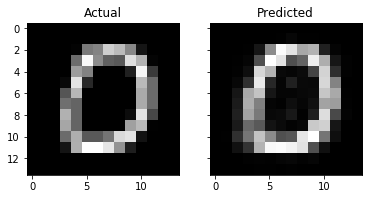

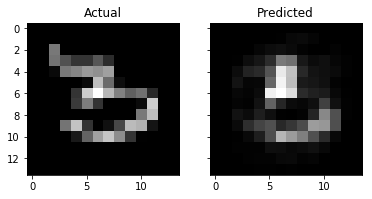

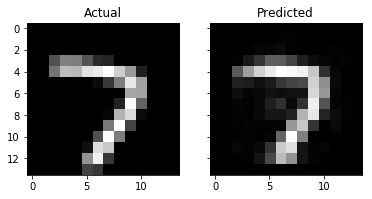

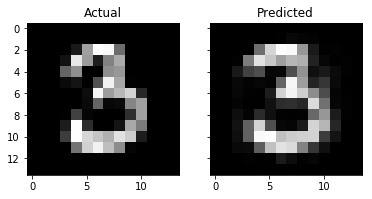

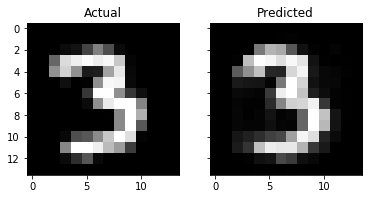

In [4]:
rand_int = np.random.randint(0,X_test.shape[0],size=(1, 5))[0]
for i in range(len(rand_int)):
    Z, Y, S_Z, S_Y = forward_pass(X_test[rand_int[i], :], W_hi, W_jh, b_h, b_o)
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    ax1.title.set_text('Actual')
    ax1.imshow(np.reshape(X_test[rand_int[i],:], (14,14)), cmap = "gray")
    ax2.title.set_text('Predicted')
    ax2.imshow(np.reshape(S_Y, (14,14)), cmap = "gray")

## Conclusions:

### The autoencoder was implemented and the results are satisfactory.